## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [0]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Using TensorFlow backend.


4423680/4422102 [==============================] - 2s 0us/step


### Find no.of samples are there in training and test datasets

In [7]:
x_train.shape

(60000, 28, 28)

In [8]:
x_test.shape

(10000, 28, 28)

### Find dimensions of an image in the dataset

In [13]:
print(x_train[0].shape)

(28, 28)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
trainY = tf.keras.utils.to_categorical(y_train, num_classes=10)


In [0]:
testY = tf.keras.utils.to_categorical(y_test, num_classes=10)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')


In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
#x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
#x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

In [19]:
x_train.shape

(60000, 28, 28, 1)

### Import the necessary layers from keras to build the model

In [0]:
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [25]:
model1 = Sequential()

# 1st Conv Layer
model1.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model1.add(Activation('relu'))

# 2nd Conv Layer
model1.add(Convolution2D(32, 3, 3))
model1.add(Activation('relu'))

# Fully Connected Layer
model1.add(Flatten())
model1.add(Dense(128))
model1.add(Activation('relu'))

# Prediction Layer
model1.add(Dense(10))
model1.add(Activation('softmax'))

# Loss and Optimizer
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

model1.fit(x_train, trainY, batch_size=32, nb_epoch=10, 
validation_data=(x_test, testY), callbacks=callback_list)
    
    

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/10





60000/60000 [==============================] - 30s 496us/step - loss: 0.3676 - acc: 0.8669 - val_loss: 0.3118 - val_acc: 0.8873
Epoch 2/10
60000/60000 [==============================] - 22s 362us/step - loss: 0.2271 - acc: 0.9166 - val_loss: 0.2558 - val_acc: 0.9046
Epoch 3/10
60000/60000 [==============================] - 22s 361us/step - loss: 0.1648 - acc: 0.9383 - val_loss: 0.2432 - val_acc: 0.9129
Epoch 4/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.1143 - acc: 0.9565 - val_loss: 0.2452 - val_acc: 0.9159
Epoch 5/10
60000/60000 [==============================] - 21s 356us/step - loss: 0.0750 - acc: 0.9722 - val_loss: 0.3023 - val_acc: 0.9145
Epoch 6/10
60000/60000 [==============================] - 22s 364us/step - loss: 0.0483 - acc: 0.9822 - val_loss: 0.3472 - val_acc: 0.9144
Epoch 7/10
600

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [26]:
model3 = Sequential()

# 1st Conv Layer
model3.add(Convolution2D(32, 3, 3, input_shape=(28, 28, 1)))
model3.add(Activation('relu'))

# 2nd Conv Layer
model3.add(Convolution2D(32, 3, 3))
model3.add(Activation('relu'))

# Max Pooling
model3.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model3.add(Dropout(0.25))

# Fully Connected Layer
model3.add(Flatten())
model3.add(Dense(128))
model3.add(Activation('relu'))
    
# Prediction Layer
model3.add(Dense(10))
model3.add(Activation('softmax'))

# Loss and Optimizer
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
# Store Training Results
early_stopping = keras.callbacks.EarlyStopping(monitor='val_acc', patience=5, verbose=1, mode='auto')
callback_list = [early_stopping]

# Train the model
model3.fit(x_train, trainY, batch_size=32, nb_epoch=10, 
              validation_data=(x_test, testY), callbacks=callback_list)
    



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 20s 331us/step - loss: 0.3969 - acc: 0.8569 - val_loss: 0.3023 - val_acc: 0.8887
Epoch 2/10
60000/60000 [==============================] - 19s 322us/step - loss: 0.2611 - acc: 0.9036 - val_loss: 0.2665 - val_acc: 0.9034
Epoch 3/10
60000/60000 [==============================] - 19s 324us/step - loss: 0.2128 - acc: 0.9217 - val_loss: 0.2307 - val_acc: 0.9159
Epoch 4/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1792 - acc: 0.9334 - val_loss: 0.2259 - val_acc: 0.9164
Epoch 5/10
60000/60000 [==============================] - 19s 325us/step - loss: 0.1514 - acc: 0.9430 - val_loss: 0.2511 - val_acc: 0.9123
Epoch 6/10
60000/60000 [==============================] - 19s 321us/step - loss: 0.1305 - acc: 0.9505 - val_loss: 0.2291 - val_acc: 0.9212
Epoch 7/10
60000/60000 [==============================] - 19s 314us/step - loss: 0.1104 - acc: 0.9576 - val_loss: 0.

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

# Prepare the generator
datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

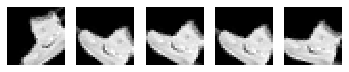

In [28]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [31]:
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model3.fit_generator(datagen.flow(x_train, trainY,
                        batch_size=32),
                        samples_per_epoch=x_train.shape[0],
                        nb_epoch=10,
                        validation_data=(x_test, testY), callbacks=callback_list)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., steps_per_epoch=1875, epochs=10)`
  


Epoch 1/10
1875/1875 [==============================] - 36s 19ms/step - loss: 0.7776 - acc: 0.7181 - val_loss: 0.3333 - val_acc: 0.8824
Epoch 2/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.5374 - acc: 0.8004 - val_loss: 0.3349 - val_acc: 0.8836
Epoch 3/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.4837 - acc: 0.8202 - val_loss: 0.3282 - val_acc: 0.8837
Epoch 4/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.4514 - acc: 0.8332 - val_loss: 0.3378 - val_acc: 0.8785
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4274 - acc: 0.8416 - val_loss: 0.3306 - val_acc: 0.8872
Epoch 6/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.4146 - acc: 0.8470 - val_loss: 0.3193 - val_acc: 0.8924
Epoch 7/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.3985 - acc: 0.8520 - val_loss: 0.3097 - val_acc: 0.8951
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [33]:
loss_and_metrics = model3.evaluate(x_test, testY)
print(loss_and_metrics)

10000/10000 [==============================] - 1s 92us/step
[0.33312656137049196, 0.8827]


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (350, 150)

### **Load CIFAR10 dataset**

In [0]:
%matplotlib inline
# Load/Prep the Data
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [42]:
X_train.shape

(50000, 32, 32, 3)

In [43]:
X_test.shape

(10000, 32, 32, 3)

In [0]:
num_train, depth, height, width = X_train.shape # there are 50000 training examples in CIFAR-10 
num_test = X_test.shape[0] # there are 10000 test examples in CIFAR-10
num_classes = np.unique(y_train).shape[0] # there are 10 image classes

X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= np.max(X_train) # Normalise data to [0, 1] range
X_test /= np.max(X_train) # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
from keras.preprocessing.image import ImageDataGenerator

# This will do preprocessing and realtime data augmentation:
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    #zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images



### **Prepare/fit the generator.**

In [0]:
# Prepare the generator
datagen.fit(X_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

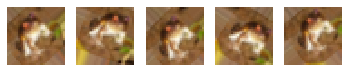

In [73]:
gen = datagen.flow(X_train[:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()